### DataScience Major Project


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("adult.csv")

In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns=["Age","Workclass","Fnlwgt","Education","education_num","marital_status"," occupation","relationship","race","sex","capital_gain",
"capital_loss","hours_per_week","native_country","income"]

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
corr = df.corr()
corr

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


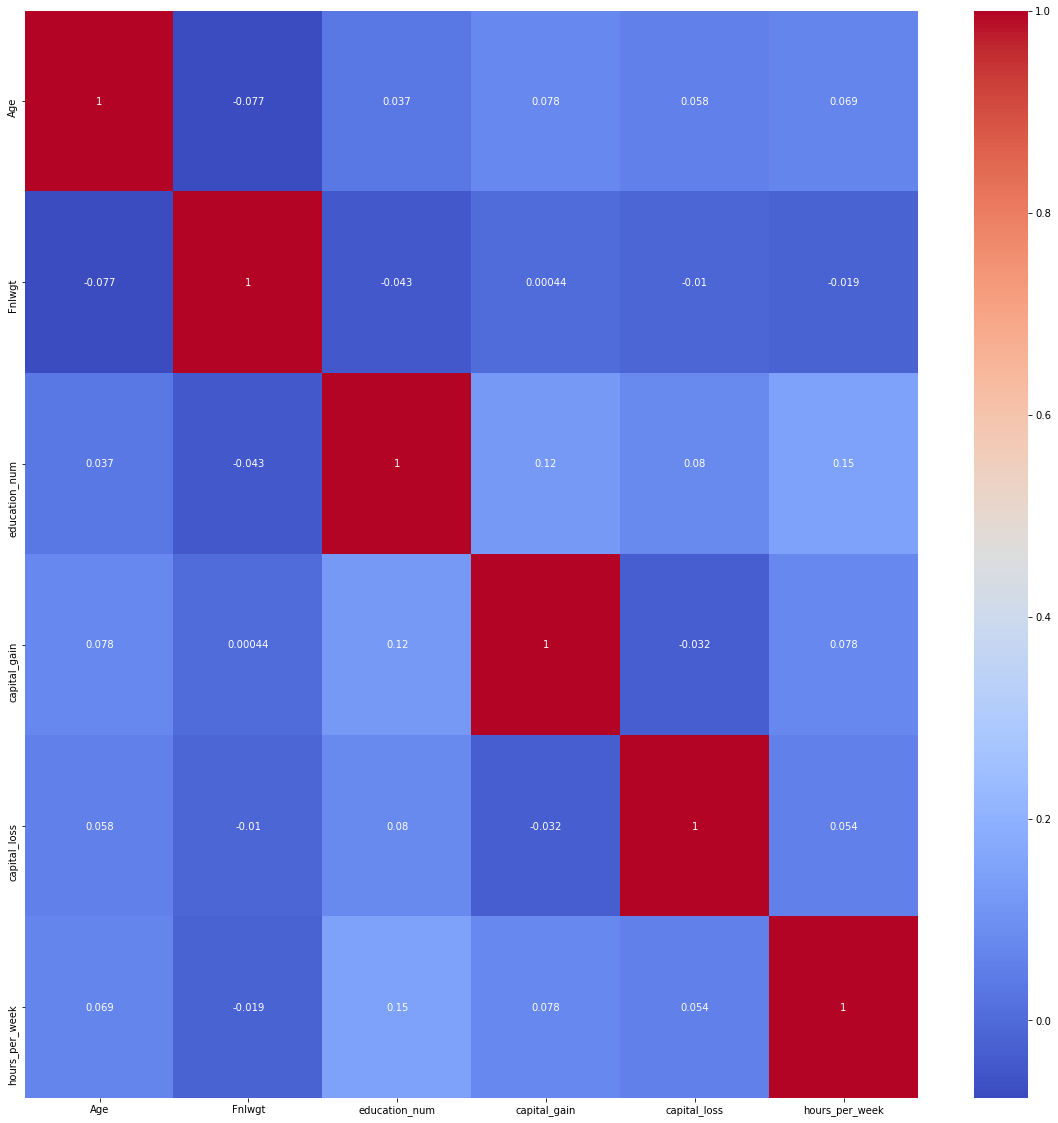

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
cat_cols

['Workclass',
 'Education',
 'marital_status',
 ' occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])



In [ ]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
education_num     int64
marital_status    int32
 occupation       int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x)
print(y)
print(x.shape)
print(y.shape)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
0                4      

In [ ]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
 occupation       0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
df.shape

(32560, 15)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
7075    30          4  280927          9             13               4   
12775   39          4  181943          9             13               4   
5972    32          4  165226         11              9               0   
62      42          4  116632         10             16               2   
18980   25          4  323139          9             13               4   
...    ...        ...     ...        ...            ...             ...   
11291   51          4   29580          1              7               2   
16495   51          4  221672         12             14               2   
19908   56          4  136472          5              4               2   
2962    37          6   29814         11              9               4   
21642   34          4  169527         15             10               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
7075             1      

In [ ]:
print(x_train)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
7075    30          4  280927          9             13               4   
12775   39          4  181943          9             13               4   
5972    32          4  165226         11              9               0   
62      42          4  116632         10             16               2   
18980   25          4  323139          9             13               4   
...    ...        ...     ...        ...            ...             ...   
11291   51          4   29580          1              7               2   
16495   51          4  221672         12             14               2   
19908   56          4  136472          5              4               2   
2962    37          6   29814         11              9               4   
21642   34          4  169527         15             10               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
7075             1      

In [ ]:
print(x_test,y_test)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

In [ ]:
ds=pd.Series(df.columns)

In [ ]:
print(ds)

0                Age
1          Workclass
2             Fnlwgt
3          Education
4      education_num
5     marital_status
6         occupation
7       relationship
8               race
9                sex
10      capital_gain
11      capital_loss
12    hours_per_week
13    native_country
14            income
dtype: object


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    ypred=model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('confusion matrix\n',cm)
    print('Classification report\n',classification_report(y_test,ypred))
    print('Acc score',accuracy_score(y_test,ypred))
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    print("missclassification rate:",(1-accuracy_score(y_test,ypred)))

#### Logistsic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
import numpy as np
import sys
ypred_m1 = m1.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(ypred_m1)

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [ ]:

gen_metrics(m1,x_train,x_test,y_train,y_test)
ypred_m1 = m1.predict(x_test)


confusion matrix
 [[5851  342]
 [1373  574]]
Classification report
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      6193
           1       0.63      0.29      0.40      1947

    accuracy                           0.79      8140
   macro avg       0.72      0.62      0.64      8140
weighted avg       0.77      0.79      0.76      8140

Acc score 0.7893120393120393
Training score 0.7877559377559378
Testing score 0.7893120393120393
missclassification rate: 0.2106879606879607


In [ ]:
inc=[]
for i in ypred_m1:
    if i==1:
        inc.append(">=50k")
    else:
        inc.append("<=50k")
print(inc)


['<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', 

In [ ]:
print(x_test,ypred_m1,inc)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

### Validation

In [ ]:

# Precision - TP/(TP+FP), TN/(TN+FN)
# Recall - TP/(TP+FN), TN/(TN+FP)
# F1-Score - 2 * Precision * Recall /( Precision + Recall)
# Accuracy - (TP+TN)/(TP+TN+FP+FN)
TP=5851
FN=342
FP=1373
TN=574
pre0=TP/(TP+FP)
pre1=TN/(TN+FN)
recall0=TP/(TP+FN)
recall1=TN/(TN+FP)
f1score0=(2*pre0*recall0)/(pre0+recall0)
f1score1=(2*pre1*recall1)/(pre1+recall1)
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Misclassification=1-Accuracy
print("validating precision of true positive",pre0)
print("validating precision of true negative",pre1)
print("validating recall for true positive",recall0)
print("validating recall for true negaitve",recall1)
print("validating f1 score for true positive:",f1score0)
print("validating f1 score for true negative:",f1score1)
print("validating accuracy",Accuracy)
print("Percentage of Misclassification:",Misclassification)

validating precision of true positive 0.8099390919158361
validating precision of true negative 0.6266375545851528
validating recall for true positive 0.944776360406911
validating recall for true negaitve 0.2948125321006677
validating f1 score for true positive: 0.8721770887679808
validating f1 score for true negative: 0.40097799511002447
validating accuracy 0.7893120393120393
Percentage of Misclassification: 0.2106879606879607


#### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=15)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=15)

In [ ]:
import numpy as np
import sys
ypred_m2 = m2.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(ypred_m2)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 

In [ ]:
inc=[]
for i in ypred_m2:
    if i==1:
        inc.append(">=50k")
    else:
        inc.append("<=50k")
print(inc)

['<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', 

In [ ]:
print(x_test,ypred_m2,inc)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

In [ ]:
gen_metrics(m2,x_train,x_test,y_train,y_test)

confusion matrix
 [[5852  341]
 [ 906 1041]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6193
           1       0.75      0.53      0.63      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.74      0.76      8140
weighted avg       0.84      0.85      0.84      8140

Acc score 0.8468058968058968
Training score 0.8611384111384112
Testing score 0.8468058968058968
missclassification rate: 0.1531941031941032


### Validation

In [ ]:
#1)validating precision: TP/(TP+FP), TN/(TN+FN))
#2) Recall - TP/(TP+FN), TN/(TN+FP)
#3) F1-Score - 2 * Precision * Recall /( Precision + Recall)
import numpy as np
TP=5852
FN=341
FP=906
TN=1041
pre0=TP/(TP+FP)
pre1=TN/(TN+FN)
recall0=TP/(TP+FN)
recall1=TN/(TN+FP)
f1score0=(2*pre0*recall0)/(pre0+recall0)
f1score1=(2*pre1*recall1)/(pre1+recall1)
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Misclassification=1-Accuracy
print("validating precision of true positive",pre0)
print("validating precision of true negative",pre1)
print("validating recall for true positive",recall0)
print("validating recall for true negaitve",recall1)
print("validating f1 score for true positive:",f1score0)
print("validating f1 score for true negative:",f1score1)
print("validating accuracy",Accuracy)
print("Percentage of Misclassification:",Misclassification)

validating precision of true positive 0.8659366676531518
validating precision of true negative 0.7532561505065123
validating recall for true positive 0.9449378330373002
validating recall for true negaitve 0.5346687211093991
validating f1 score for true positive: 0.9037139989190024
validating f1 score for true negative: 0.6254130369480325
validating accuracy 0.8468058968058968
Percentage of Misclassification: 0.1531941031941032


#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier(n_estimators=85,criterion='entropy',max_depth=7,min_samples_split=15)
m3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=15,
                       n_estimators=85)

In [ ]:
import numpy as np
import sys
ypred_m3 = m3.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(ypred_m3)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 

In [ ]:
inc=[]
for i in ypred_m3:
    if i==1:
        inc.append(">=50k")
    else:
        inc.append("<=50k")
print(inc)

['<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', 

In [ ]:
print(x_test,ypred_m3,inc)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

In [ ]:
gen_metrics(m3,x_train,x_test,y_train,y_test)

confusion matrix
 [[5919  274]
 [ 950  997]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6193
           1       0.78      0.51      0.62      1947

    accuracy                           0.85      8140
   macro avg       0.82      0.73      0.76      8140
weighted avg       0.84      0.85      0.84      8140

Acc score 0.8496314496314497
Training score 0.8584766584766584
Testing score 0.8496314496314497
missclassification rate: 0.15036855036855035


### Validation

In [ ]:
#1)validating precision: TP/(TP+FP), TN/(TN+FN))

#2) Recall - TP/(TP+FN), TN/(TN+FP)
#3) F1-Score - 2 * Precision * Recall /( Precision + Recall)

TP=5919
FN=274
FP=950
TN=997
pre0=TP/(TP+FP)
pre1=TN/(TN+FN)
recall0=TP/(TP+FN)
recall1=TN/(TN+FP)
f1score0=(2*pre0*recall0)/(pre0+recall0)
f1score1=(2*pre1*recall1)/(pre1+recall1)
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Misclassification=1-Accuracy
print("validating precision of true positive",pre0)
print("validating precision of true negative",pre1)
print("validating recall for true positive",recall0)
print("validating recall for true negaitve",recall1)
print("validating f1 score for true positive:",f1score0)
print("validating f1 score for true negative:",f1score1)
print("validating accuracy",Accuracy)
print("Percentage of Misclassification:",Misclassification)

validating precision of true positive 0.8616974814383462
validating precision of true negative 0.7844217151848938
validating recall for true positive 0.9557564992733731
validating recall for true negaitve 0.5120698510529019
validating f1 score for true positive: 0.906293063849334
validating f1 score for true negative: 0.6196395276569298
validating accuracy 0.8496314496314497
Percentage of Misclassification: 0.15036855036855035


#### SVM


In [ ]:
from sklearn.svm import SVC
m4=SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
import sys
import numpy as np
ypred_m4 = m4.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(ypred_m5)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [ ]:
inc=[]
for i in ypred_m4:
    if i==1:
        inc.append(">=50k")
    else:
        inc.append("<=50k")
print(inc)

['<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', 

In [ ]:
print(x_test,ypred_m4,inc)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

In [ ]:
gen_metrics(m4,x_train,x_test,y_train,y_test)

confusion matrix
 [[5863  330]
 [1321  626]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6193
           1       0.65      0.32      0.43      1947

    accuracy                           0.80      8140
   macro avg       0.74      0.63      0.65      8140
weighted avg       0.78      0.80      0.77      8140

Acc score 0.7971744471744472
Training score 0.7960687960687961
Testing score 0.7971744471744472
missclassification rate: 0.2028255528255528


### Validation

In [ ]:
#1)validating precision: TP/(TP+FP), TN/(TN+FN))
#2) Recall - TP/(TP+FN), TN/(TN+FP)
#3) F1-Score - 2 * Precision * Recall /( Precision + Recall)
import numpy as np
TP=5863
FN=330
FP=1321
TN=626
pre0=TP/(TP+FP)
pre1=TN/(TN+FN)
recall0=TP/(TP+FN)
recall1=TN/(TN+FP)
f1score0=(2*pre0*recall0)/(pre0+recall0)
f1score1=(2*pre1*recall1)/(pre1+recall1)
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Misclassification=1-Accuracy
print("validating precision of true positive",pre0)
print("validating precision of true negative",pre1)
print("validating recall for true positive",recall0)
print("validating recall for true negaitve",recall1)
print("validating f1 score for true positive:",f1score0)
print("validating f1 score for true negative:",f1score1)
print("validating accuracy",Accuracy)
print("Percentage of Misclassification:",Misclassification)

validating precision of true positive 0.816119153674833
validating precision of true negative 0.6548117154811716
validating recall for true positive 0.9467140319715808
validating recall for true negaitve 0.32152028762198254
validating f1 score for true positive: 0.8765792031098153
validating f1 score for true negative: 0.4312779882879779
validating accuracy 0.7971744471744472
Percentage of Misclassification: 0.2028255528255528


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
m5=KNeighborsClassifier(n_neighbors=33)
m5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
import numpy as np
import sys
ypred_m5 = m5.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(ypred_m5)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [ ]:
inc=[]
for i in ypred_m5:
    if i==1:
        inc.append(">=50k")
    else:
        inc.append("<=50k")
print(inc)

['<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '>=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', '<=50k', 

In [ ]:
print(x_test,ypred_m5,inc)

       Age  Workclass  Fnlwgt  Education  education_num  marital_status  \
108     42          4  124692         11              9               2   
8455    26          4  186151         11              9               5   
20652   19          4  120277         11              9               4   
9604    22          4  100345          9             13               4   
16180   60          2   93272         11              9               2   
...    ...        ...     ...        ...            ...             ...   
28538   27          4  279960         11              9               2   
31227   31          4  162160         11              9               2   
3504    32          6   65278         10             16               2   
184     34          4  304030         11              9               2   
5214    25          4   91334          8             11               2   

        occupation  relationship  race  sex  capital_gain  capital_loss  \
108              6      

In [ ]:
gen_metrics(m5,x_train,x_test,y_train,y_test)

confusion matrix
 [[6155   38]
 [1577  370]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      6193
           1       0.91      0.19      0.31      1947

    accuracy                           0.80      8140
   macro avg       0.85      0.59      0.60      8140
weighted avg       0.82      0.80      0.75      8140

Acc score 0.8015970515970516
Training score 0.7991400491400491
Testing score 0.8015970515970516
missclassification rate: 0.19840294840294836


### Validation

In [ ]:
#1)validating precision: TP/(TP+FP), TN/(TN+FN))
#2) Recall - TP/(TP+FN), TN/(TN+FP)
#3) F1-Score - 2 * Precision * Recall /( Precision + Recall)
import numpy as np
TP=6155
FN=38
FP=1577
TN=370
pre0=TP/(TP+FP)
pre1=TN/(TN+FN)
recall0=TP/(TP+FN)
recall1=TN/(TN+FP)
f1score0=(2*pre0*recall0)/(pre0+recall0)
f1score1=(2*pre1*recall1)/(pre1+recall1)
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Misclassification=1-Accuracy
print("validating precision of true positive",pre0)
print("validating precision of true negative",pre1)
print("validating recall for true positive",recall0)
print("validating recall for true negaitve",recall1)
print("validating f1 score for true positive:",f1score0)
print("validating f1 score for true negative:",f1score1)
print("validating accuracy",Accuracy)
print("Percentage of Misclassification:",Misclassification)

validating precision of true positive 0.7960424211070875
validating precision of true negative 0.9068627450980392
validating recall for true positive 0.9938640400452123
validating recall for true negaitve 0.19003595274781715
validating f1 score for true positive: 0.8840215439856374
validating f1 score for true negative: 0.31422505307855625
validating accuracy 0.8015970515970516
Percentage of Misclassification: 0.19840294840294836


In [ ]:
#Best algorithm based on the accuarcy-Randomforest
